In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
vpn = pd.read_csv('vpn.csv')
vpn.head()

,user_country,location_selected,protocol,date,time_to_connect,download_speed,latency
0,GB,UK - London,udp,2018-02-06,15.0,58942.0,88.0
1,FR,France - Paris - 1,udp,2018-02-06,61.0,11878.0,528.0
2,GB,UK - London,udp,2018-02-06,52.0,18254.0,322.0
3,GB,UK - London,udp,2018-02-06,21.0,93798.0,38.0
4,GB,UK - London,tcp,2018-02-06,100.0,12048.0,460.0


In [4]:
vpn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 7 columns):
user_country         65534 non-null object
location_selected    65534 non-null object
protocol             65512 non-null object
date                 65534 non-null object
time_to_connect      65435 non-null float64
download_speed       65427 non-null float64
latency              50741 non-null float64
dtypes: float64(3), object(4)
memory usage: 3.5+ MB


In [5]:
vpn.date = pd.to_datetime(vpn.date)
vpn['year'] = vpn.date.dt.year
vpn.head()

,user_country,location_selected,protocol,date,time_to_connect,download_speed,latency,year
0,GB,UK - London,udp,2018-02-06,15.0,58942.0,88.0,2018
1,FR,France - Paris - 1,udp,2018-02-06,61.0,11878.0,528.0,2018
2,GB,UK - London,udp,2018-02-06,52.0,18254.0,322.0,2018
3,GB,UK - London,udp,2018-02-06,21.0,93798.0,38.0,2018
4,GB,UK - London,tcp,2018-02-06,100.0,12048.0,460.0,2018


In [6]:
vpn['day'] = vpn.date.dt.day
vpn.head()

,user_country,location_selected,protocol,date,time_to_connect,download_speed,latency,year,day
0,GB,UK - London,udp,2018-02-06,15.0,58942.0,88.0,2018,6
1,FR,France - Paris - 1,udp,2018-02-06,61.0,11878.0,528.0,2018,6
2,GB,UK - London,udp,2018-02-06,52.0,18254.0,322.0,2018,6
3,GB,UK - London,udp,2018-02-06,21.0,93798.0,38.0,2018,6
4,GB,UK - London,tcp,2018-02-06,100.0,12048.0,460.0,2018,6


In [11]:
# new df with only numeric data
table = vpn.drop(columns=vpn.columns[:4])
table.head()

,time_to_connect,download_speed,latency,year,day
0,15.0,58942.0,88.0,2018,6
1,61.0,11878.0,528.0,2018,6
2,52.0,18254.0,322.0,2018,6
3,21.0,93798.0,38.0,2018,6
4,100.0,12048.0,460.0,2018,6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21ed3828>,
      dtype=object)

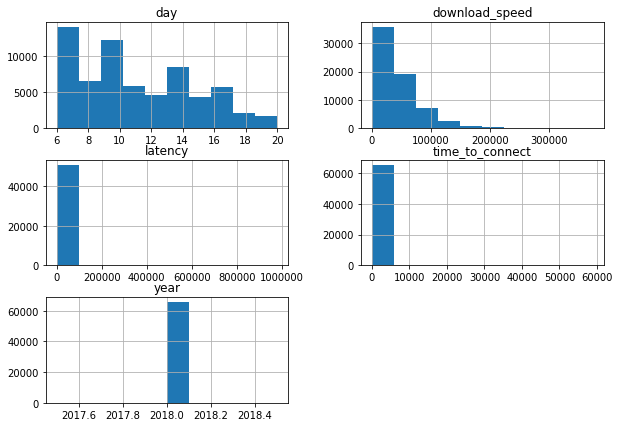

In [98]:
table.hist(figsize=(10,7))

In [13]:
table.isna().any()

time_to_connect     True
download_speed      True
latency             True
year               False
day                False
dtype: bool

In [20]:
table['time_to_connect'].isna().value_counts()

False    65435
True        99
Name: time_to_connect, dtype: int64

In [21]:
table['download_speed'].isna().value_counts()

False    65427
True       107
Name: download_speed, dtype: int64

for time-to-connect and dl speed, just a few nan columns, can be dropped. 

In [22]:
table['latency'].isna().value_counts()

False    50741
True     14793
Name: latency, dtype: int64

In [99]:
table.isna().sum()

time_to_connect       99
download_speed       107
latency            14793
year                   0
day                    0
dtype: int64

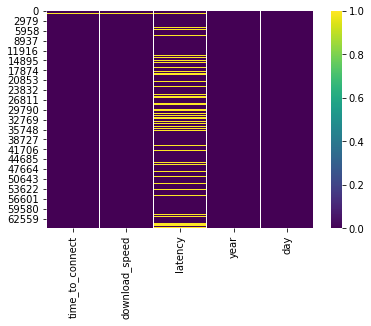

In [101]:
missing_values = table.isna()
sns.heatmap(data = missing_values, cmap='viridis')
# y-axis: row index

In [25]:
print(vpn.shape)
dropna = table.dropna(subset=['time_to_connect', 'download_speed', 'latency'])
print(dropna.shape)

(65534, 9)
(50733, 5)


In [26]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

In [27]:
imputer.fit(table)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [109]:
imputer.statistics_

array([4.0000e+01, 3.3162e+04, 1.0200e+02, 2.0180e+03, 1.0000e+01])

In [111]:
imputer.fit_transform(table)
# same as variable X

array([[1.50000000e+01, 5.89420000e+04, 8.80000000e+01, 2.01800000e+03,
        6.00000000e+00],
       [6.10000000e+01, 1.18780000e+04, 5.28000000e+02, 2.01800000e+03,
        6.00000000e+00],
       [5.20000000e+01, 1.82540000e+04, 3.22000000e+02, 2.01800000e+03,
        6.00000000e+00],
       ...,
       [8.10000000e+01, 5.28304143e+04, 8.50000000e+01, 2.01800000e+03,
        1.90000000e+01],
       [3.00000000e+02, 2.63163060e+03, 3.81300000e+03, 2.01800000e+03,
        1.90000000e+01],
       [8.40000000e+01, 1.84070807e+04, 1.02000000e+02, 2.01800000e+03,
        1.90000000e+01]])

In [30]:
X = imputer.transform(table)
table_tr = pd.DataFrame(X, columns=table.columns)
table_tr.head()

,time_to_connect,download_speed,latency,year,day
0,15.0,58942.0,88.0,2018.0,6.0
1,61.0,11878.0,528.0,2018.0,6.0
2,52.0,18254.0,322.0,2018.0,6.0
3,21.0,93798.0,38.0,2018.0,6.0
4,100.0,12048.0,460.0,2018.0,6.0


In [92]:
table_tr.isnull().any()

time_to_connect    False
download_speed     False
latency            False
year               False
day                False
dtype: bool

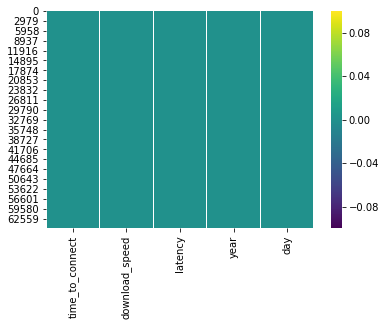

In [103]:
missing_values = table_tr.isna()
sns.heatmap(data = missing_values, cmap='viridis')
#missing values are all filled

In [39]:
table[table.time_to_connect.isna() == True].head()

,time_to_connect,download_speed,latency,year,day
908,NaN,NaN,NaN,2018,6
2107,NaN,NaN,NaN,2018,6
2678,NaN,NaN,NaN,2018,7
2825,NaN,NaN,NaN,2018,6
3016,NaN,NaN,NaN,2018,6


In [42]:
pd.DataFrame(table_tr.iloc[908]).T
# NaN value is filled with median values

,time_to_connect,download_speed,latency,year,day
908,40.0,33162.0,102.0,2018.0,6.0


In [46]:
df = table_tr.copy()
df['user_country'] = vpn.user_country
df['protocol'] = vpn.protocol
df.head()

,time_to_connect,download_speed,latency,year,day,user_country,protocol
0,15.0,58942.0,88.0,2018.0,6.0,GB,udp
1,61.0,11878.0,528.0,2018.0,6.0,FR,udp
2,52.0,18254.0,322.0,2018.0,6.0,GB,udp
3,21.0,93798.0,38.0,2018.0,6.0,GB,udp
4,100.0,12048.0,460.0,2018.0,6.0,GB,tcp


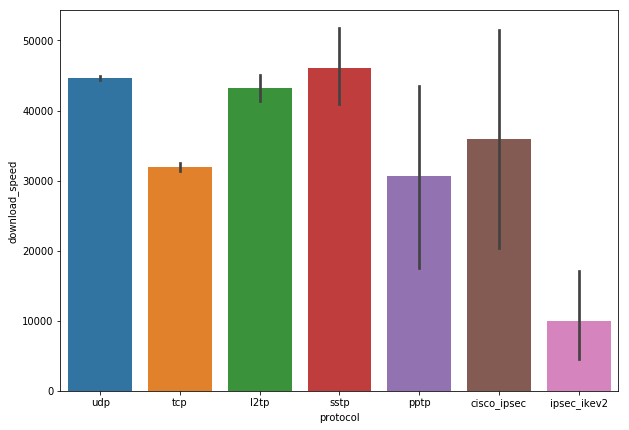

In [52]:
plt.figure(figsize=(10,7))
sns.barplot(data=vpn, x='protocol', y='download_speed')

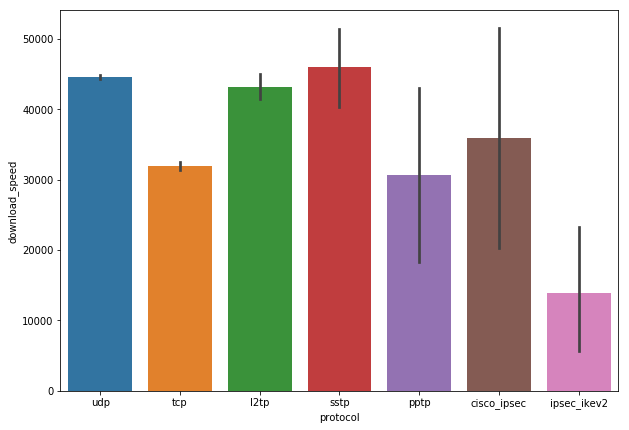

In [51]:
plt.figure(figsize=(10,7))
sns.barplot(data=df, x='protocol', y='download_speed')

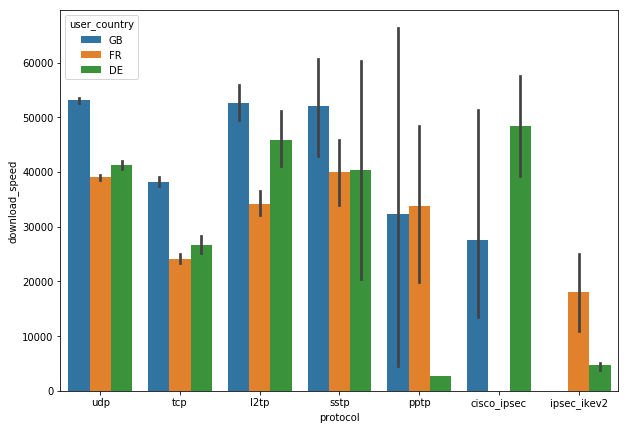

In [53]:
plt.figure(figsize=(10,7))
sns.barplot(data=vpn, x='protocol', y='download_speed', hue='user_country')

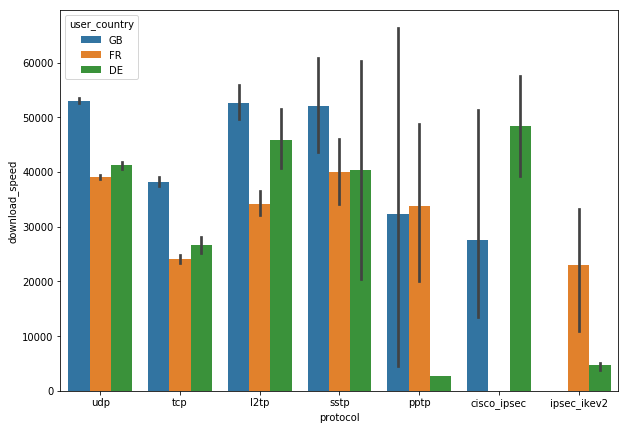

In [54]:
plt.figure(figsize=(10,7))
sns.barplot(data=df, x='protocol', y='download_speed', hue='user_country')

In [94]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
country_cat = vpn.user_country   # select column
country_encoded = encoder.fit_transform(country_cat)
country_encoded

array([2, 1, 2, ..., 2, 1, 1])

In [95]:
encoder.classes_

array(['DE', 'FR', 'GB'], dtype=object)

In [110]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
country_cat = vpn.user_country   # select column
country_cat_1hot = encoder.fit_transform(country_cat)
country_cat_1hot

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0]])

Dataset from https://www.mldata.io/dataset-details/school_grades/

In [55]:
grades = pd.read_csv('school_grades_dataset.csv')
grades.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [56]:
grades.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [58]:
grades[['reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']].head()

,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no
1,course,father,1,2,0,no,yes,no,no,no,yes,yes,no
2,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no
3,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes
4,home,father,1,2,0,no,yes,no,no,yes,yes,no,no


In [59]:
grades.Mjob.value_counts()

other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64

In [60]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Mjob_cat = grades.Mjob   # select column
Mjob_encoded = encoder.fit_transform(Mjob_cat)
Mjob_encoded

array([0, 0, 0, 1, 2, 3, 2, 2, 3, 2, 4, 3, 1, 4, 2, 1, 3, 2, 3, 1, 4, 1,
       4, 2, 3, 3, 2, 1, 3, 4, 1, 3, 4, 2, 2, 2, 4, 2, 3, 0, 2, 4, 3, 3,
       2, 2, 2, 1, 4, 3, 3, 1, 1, 3, 2, 2, 3, 4, 2, 3, 1, 3, 2, 4, 3, 4,
       2, 3, 1, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 0, 2, 2, 3, 3, 2, 3, 0, 2,
       3, 4, 2, 3, 2, 4, 3, 0, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 1,
       4, 3, 0, 4, 1, 4, 2, 2, 2, 2, 0, 3, 2, 1, 2, 3, 2, 0, 4, 2, 3, 3,
       2, 0, 2, 3, 0, 2, 0, 3, 0, 0, 3, 2, 2, 2, 3, 4, 2, 4, 3, 3, 3, 4,
       0, 2, 2, 0, 1, 0, 0, 4, 3, 2, 0, 3, 3, 2, 0, 2, 0, 0, 2, 1, 0, 2,
       2, 0, 2, 3, 2, 1, 2, 1, 2, 2, 4, 0, 2, 4, 3, 2, 4, 2, 4, 3, 3, 2,
       2, 3, 3, 2, 1, 0, 3, 0, 0, 3, 2, 3, 3, 4, 3, 4, 1, 2, 2, 2, 3, 0,
       3, 4, 0, 4, 2, 3, 2, 3, 3, 2, 2, 3, 0, 0, 0, 0, 3, 2, 4, 2, 2, 3,
       0, 2, 1, 2, 4, 1, 2, 0, 2, 2, 2, 3, 0, 2, 2, 4, 2, 0, 2, 0, 2, 2,
       2, 0, 4, 1, 4, 4, 3, 4, 2, 3, 0, 2, 2, 2, 2, 3, 2, 2, 3, 0, 3, 2,
       2, 1, 2, 4, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 3,

In [61]:
encoder.classes_

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [64]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
Mjob_cat = grades.Mjob   # select column
Mjob_cat_1hot = encoder.fit_transform(Mjob_cat)
Mjob_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

## Feature Scaling

In [66]:
table_tr.head()

,time_to_connect,download_speed,latency,year,day
0,15.0,58942.0,88.0,2018.0,6.0
1,61.0,11878.0,528.0,2018.0,6.0
2,52.0,18254.0,322.0,2018.0,6.0
3,21.0,93798.0,38.0,2018.0,6.0
4,100.0,12048.0,460.0,2018.0,6.0


In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rescaled = scaler.fit_transform(table_tr)
rescaled[:5, :]

array([[2.55028308e-04, 1.58106088e-01, 8.99560033e-05, 0.00000000e+00,
        0.00000000e+00],
       [1.03711512e-03, 3.18615608e-02, 5.39736020e-04, 0.00000000e+00,
        0.00000000e+00],
       [8.84098135e-04, 4.89645505e-02, 3.29157194e-04, 0.00000000e+00,
        0.00000000e+00],
       [3.57039631e-04, 2.51603863e-01, 3.88446378e-05, 0.00000000e+00,
        0.00000000e+00],
       [1.70018872e-03, 3.23175690e-02, 4.70224563e-04, 0.00000000e+00,
        0.00000000e+00]])

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized = scaler.fit_transform(table_tr)
standardized[:5, :]

array([[-0.1756892 ,  0.42373938, -0.04193477,  0.        , -1.36539125],
       [-0.10966321, -0.85349768,  0.0490851 ,  0.        , -1.36539125],
       [-0.12258134, -0.68046386,  0.00647125,  0.        , -1.36539125],
       [-0.16707711,  1.36967205, -0.05227794,  0.        , -1.36539125],
       [-0.05368466, -0.84888417,  0.03501839,  0.        , -1.36539125]])

In [86]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
normalized = scaler.fit_transform(table_tr)
normalized[:5, :]

array([[2.54338149e-04, 9.99413277e-01, 1.49211714e-03, 3.42169589e-02,
        1.01735259e-04],
       [5.05807530e-03, 9.84915057e-01, 4.37813731e-02, 1.67331081e-01,
        4.97515604e-04],
       [2.83099434e-03, 9.93787899e-01, 1.75303880e-02, 1.09864357e-01,
        3.26653193e-04],
       [2.23833550e-04, 9.99768538e-01, 4.05032138e-04, 2.15093383e-02,
        6.39524428e-05],
       [8.18002371e-03, 9.85529257e-01, 3.76281091e-02, 1.65072879e-01,
        4.90801423e-04]])

In [87]:
from sklearn.preprocessing import Binarizer
scaler = Binarizer(threshold=30000)   # just example
binary = scaler.fit_transform(table_tr)
binary[:5, :]

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [88]:
rescaled_df = pd.DataFrame(rescaled, columns = table_tr.columns)
rescaled_df.head()

,time_to_connect,download_speed,latency,year,day
0,0.000255,0.158106,0.000090,0.0,0.0
1,0.001037,0.031862,0.000540,0.0,0.0
2,0.000884,0.048965,0.000329,0.0,0.0
3,0.000357,0.251604,0.000039,0.0,0.0
4,0.001700,0.032318,0.000470,0.0,0.0


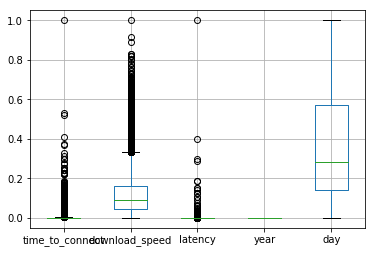

In [89]:
# MinMaxScaler()
rescaled_df.boxplot()

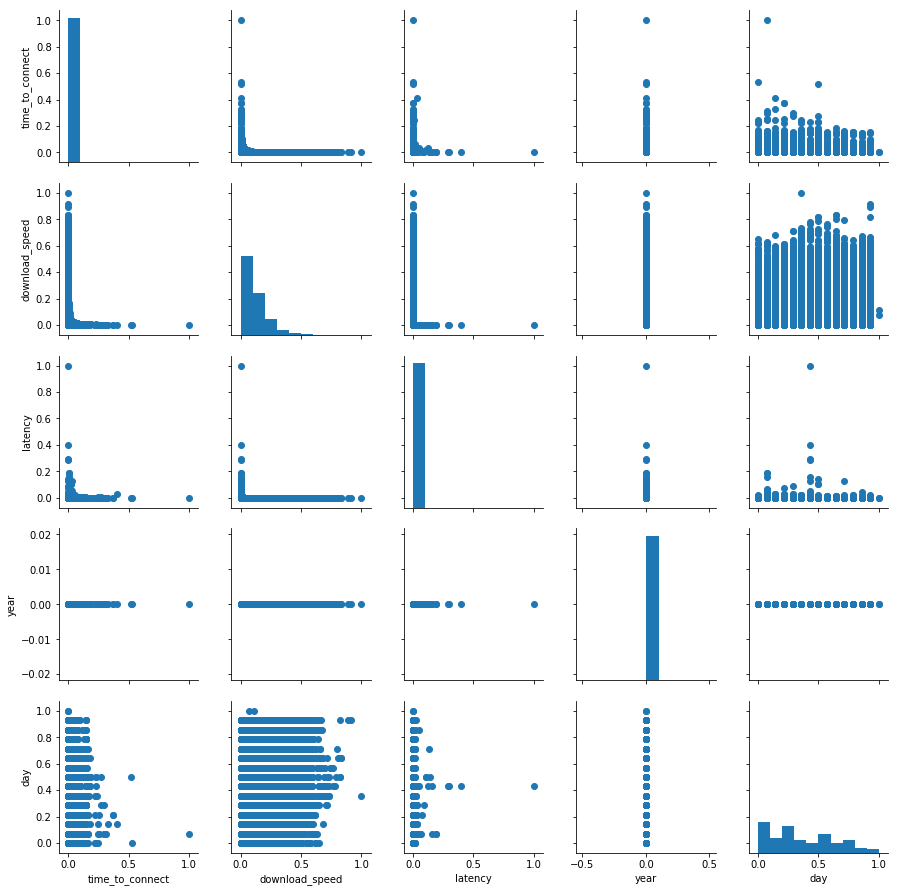

In [90]:
g = sns.PairGrid(rescaled_df)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

In [78]:
standardized_df = pd.DataFrame(standardized, columns = table_tr.columns)
standardized_df.head()

,time_to_connect,download_speed,latency,year,day
0,-0.175689,0.423739,-0.041935,0.0,-1.365391
1,-0.109663,-0.853498,0.049085,0.0,-1.365391
2,-0.122581,-0.680464,0.006471,0.0,-1.365391
3,-0.167077,1.369672,-0.052278,0.0,-1.365391
4,-0.053685,-0.848884,0.035018,0.0,-1.365391


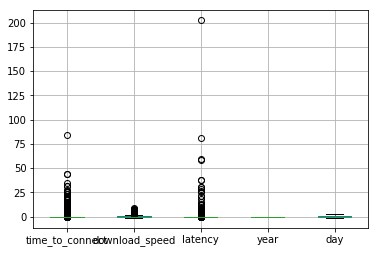

In [79]:
# StandardScaler()
standardized_df.boxplot()

In [113]:
standardized_df.describe()

,time_to_connect,download_speed,latency,year,day
count,6.553400e+04,6.553400e+04,6.553400e+04,65534.0,6.553400e+04
mean,9.539364e-18,-2.961419e-16,6.042801e-16,0.0,2.505348e-14
std,1.000008e+00,1.000008e+00,1.000008e+00,0.0,1.000008e+00
min,-1.972194e-01,-1.175846e+00,-6.013875e-02,0.0,-1.365391e+00
25%,-1.613357e-01,-7.211632e-01,-4.565831e-02,0.0,-8.207738e-01
50%,-1.398055e-01,-2.758861e-01,-3.903869e-02,0.0,-2.761564e-01
75%,-8.669765e-02,4.382715e-01,-2.724748e-02,0.0,8.130784e-01
max,8.422562e+01,8.941321e+00,2.023052e+02,0.0,2.446931e+00


In [114]:
table_tr.describe()

,time_to_connect,download_speed,latency,year,day
count,65534.000000,65534.000000,65534.000000,65534.0,65534.000000
mean,137.401852,43327.928898,290.717277,2018.0,11.014130
std,696.700693,36848.569901,4834.146153,0.0,3.672331
min,0.000000,0.000000,0.000000,2018.0,6.000000
25%,25.000000,16754.300000,70.000000,2018.0,8.000000
50%,40.000000,33162.000000,102.000000,2018.0,10.000000
75%,77.000000,59477.485325,159.000000,2018.0,14.000000
max,58817.000000,372800.317800,978256.000000,2018.0,20.000000


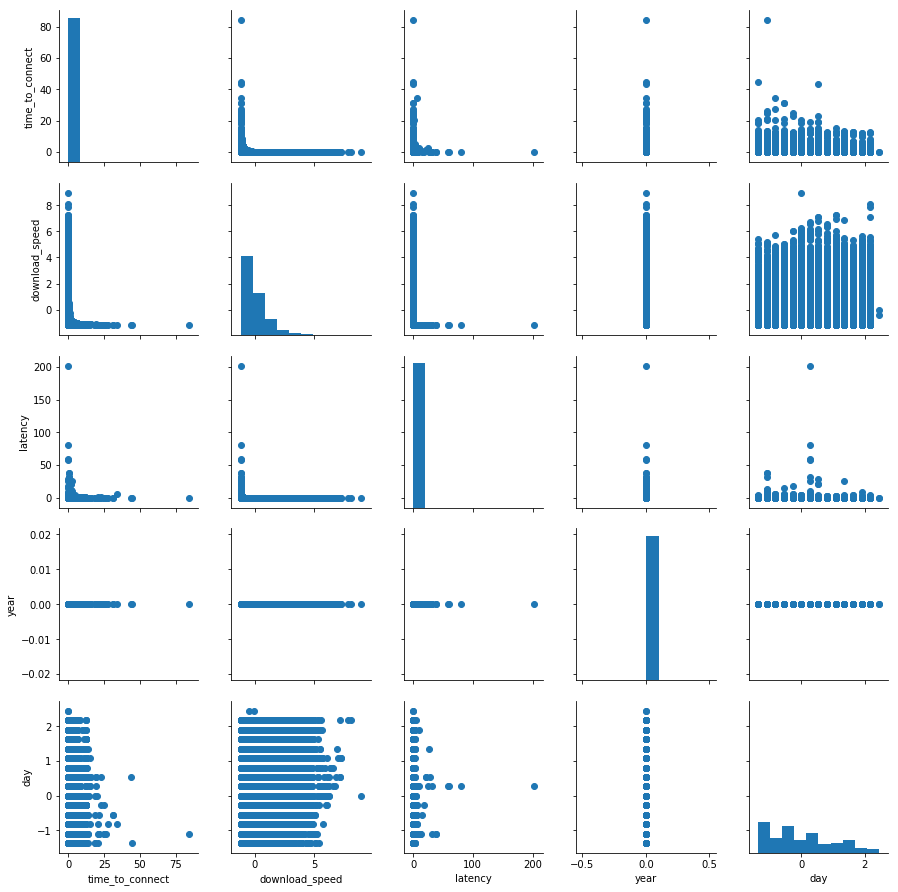

In [80]:
g = sns.PairGrid(standardized_df)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

In [81]:
normalized_df = pd.DataFrame(normalized, columns = table_tr.columns)
normalized_df.head()

,time_to_connect,download_speed,latency,year,day
0,0.000254,0.999413,0.001492,0.034217,0.000102
1,0.005058,0.984915,0.043781,0.167331,0.000498
2,0.002831,0.993788,0.017530,0.109864,0.000327
3,0.000224,0.999769,0.000405,0.021509,0.000064
4,0.008180,0.985529,0.037628,0.165073,0.000491


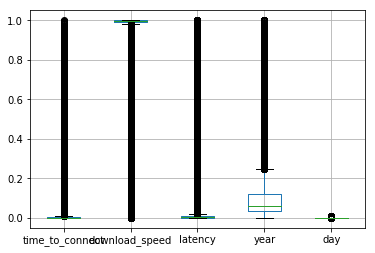

In [82]:
# Normalizer()
normalized_df.boxplot()

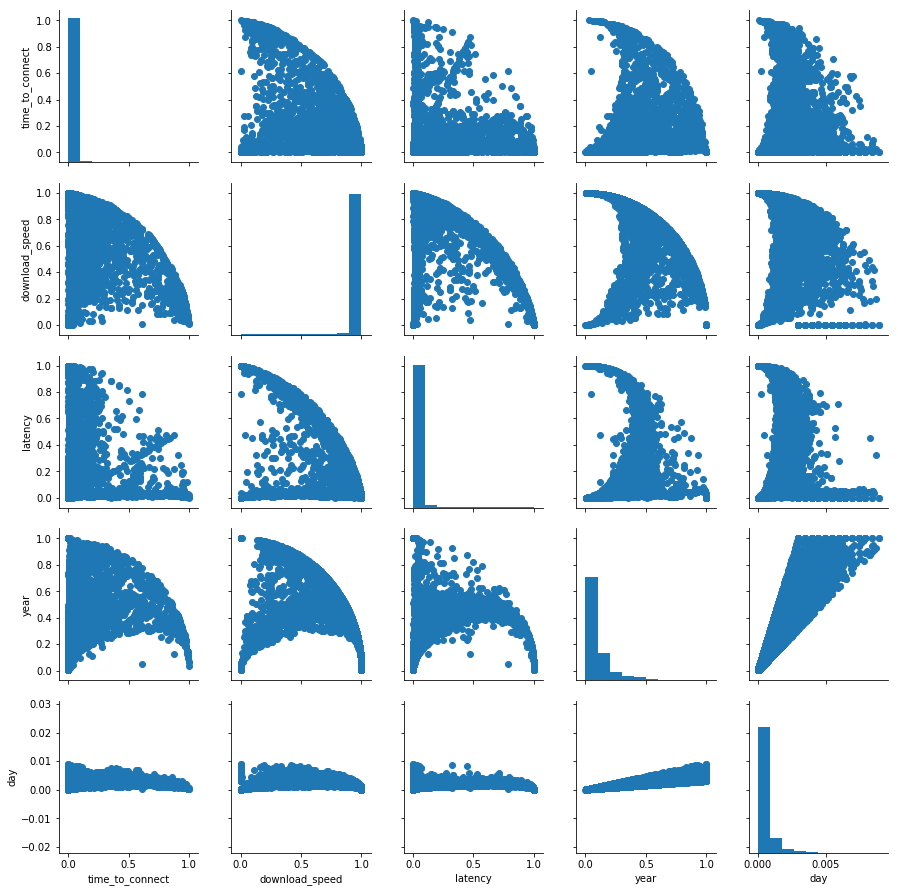

In [83]:
g = sns.PairGrid(normalized_df)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)